In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("orders.csv")
df

,created_at_utc,tariff_class,tariff_internal_name,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost,payment_currency_code,driver_call_model
0,1622145491,Эконом,econom,cancelled,waiting,Kia Rio,белый,34,52.00,RUB,no_call
1,1622145422,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,серый,34,0.00,RUB,no_call
2,1622145212,Эконом,econom,finished,complete,Renault Logan,белый,34,104.70,RUB,on_demand
3,1622054615,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,120.00,RUB,on_demand
4,1622045036,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,115.50,RUB,on_demand
...,...,...,...,...,...,...,...,...,...,...,...
1200,1617028952,Эконом,econom,finished,complete,LADA (ВАЗ) Largus,белый,34,472.40,RUB,no_call
1201,1617028458,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,белый,34,0.00,RUB,no_call
1202,1617025078,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,серый,34,146.85,RUB,no_call
1203,1616869125,Эконом,econom,cancelled,driving,LADA (ВАЗ) Largus,серый,34,0.00,RUB,no_call


In [3]:
# A bit cleaning
df['created_at_utc'] = df['created_at_utc']
df['created_at_utc'] = pd.to_datetime(df.created_at_utc, unit='s')
df.sort_values(by=['created_at_utc'], inplace=True, ascending=False)

# Data visualization

In [4]:
#Adding sepearte columns for years, months, weekdays and hour to a new df = date_df for time anaylisys

date_df = df.copy()

date_df = date_df[['created_at_utc','payment_cost']]
date_df.sort_values(by=['created_at_utc'], inplace=True)
date_df.set_index('created_at_utc', inplace=True)

date_df["year"] = date_df.index.year
date_df["month"] = date_df.index.month
date_df["weekday"] = date_df.index.weekday
date_df["hour"] = date_df.index.hour

date_df

,payment_cost,year,month,weekday,hour
created_at_utc,,,,,
2017-09-30 20:36:04,58.65,2017,9,5,20
2017-09-30 21:07:25,98.90,2017,9,5,21
2017-10-18 06:24:17,438.15,2017,10,2,6
2017-10-19 05:49:34,425.50,2017,10,3,5
2017-10-27 13:09:25,0.00,2017,10,4,13
...,...,...,...,...,...
2021-05-26 16:03:56,115.50,2021,5,2,16
2021-05-26 18:43:35,120.00,2021,5,2,18
2021-05-27 19:53:32,104.70,2021,5,3,19


<Figure size 1000x600 with 0 Axes>

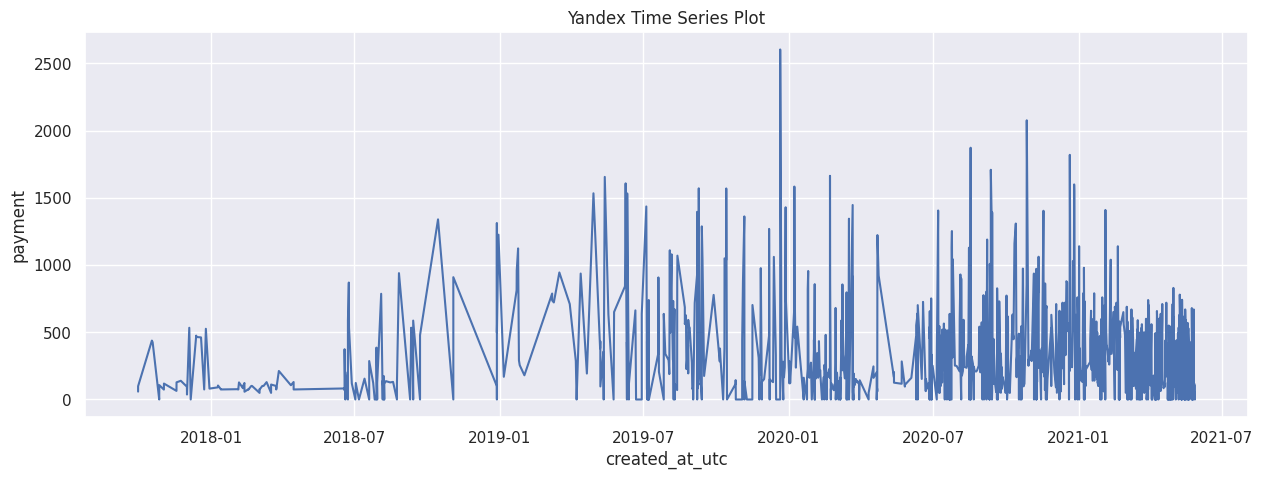

In [5]:
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(date_df.index, date_df['payment_cost'], linestyle='-')

# Add labels and title
plt.xlabel('created_at_utc')
plt.ylabel('payment')
plt.title('Whole time plot of Yandex Taxi')
# Show plot
plt.show()

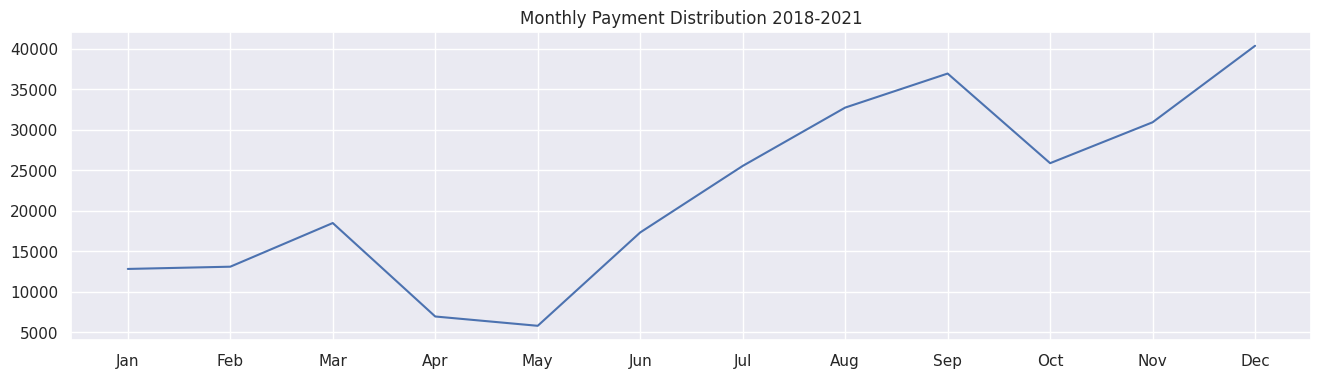

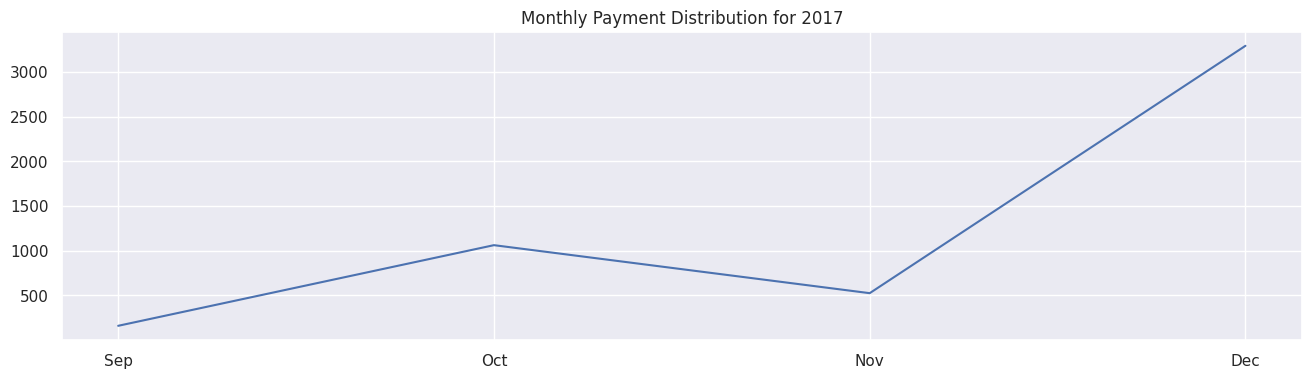

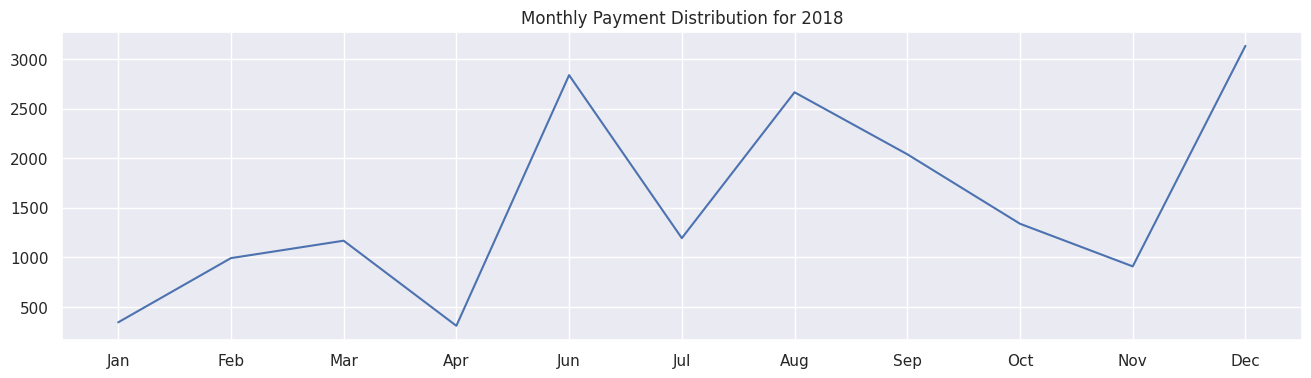

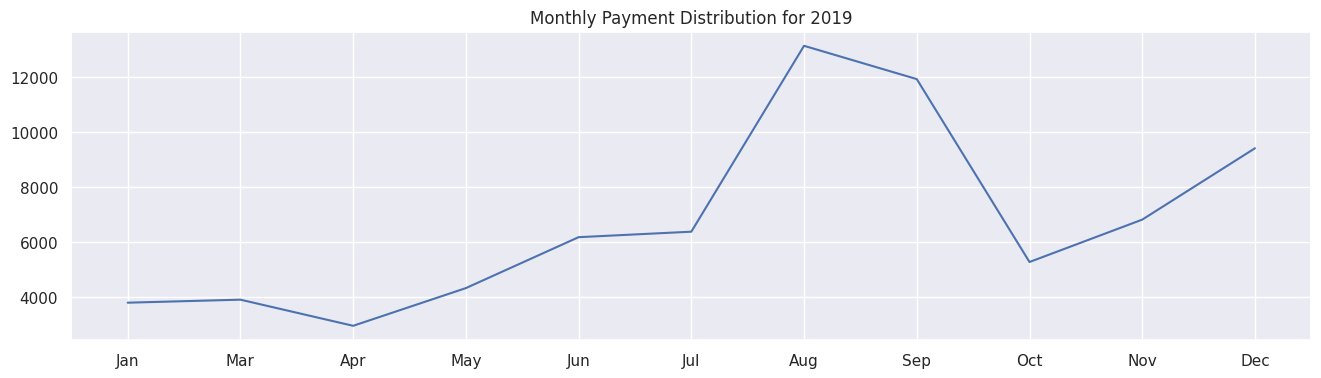

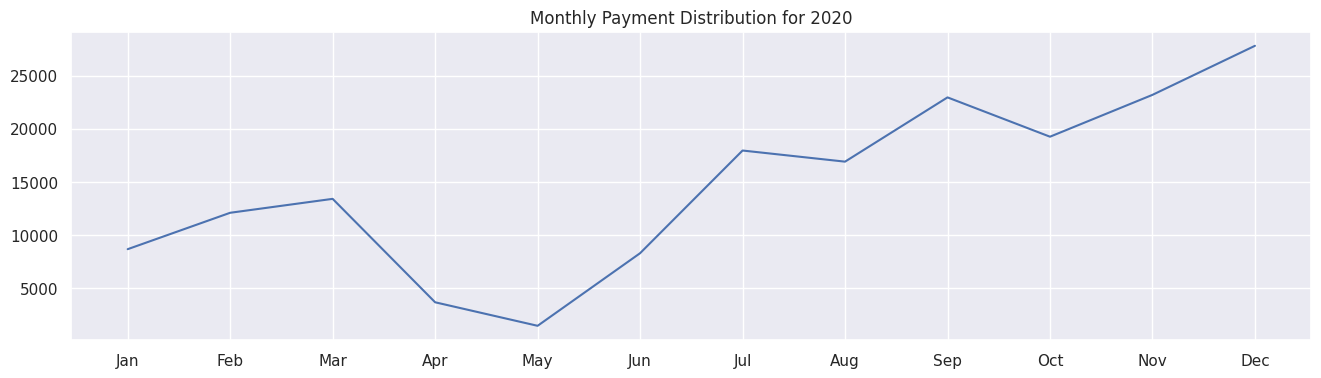

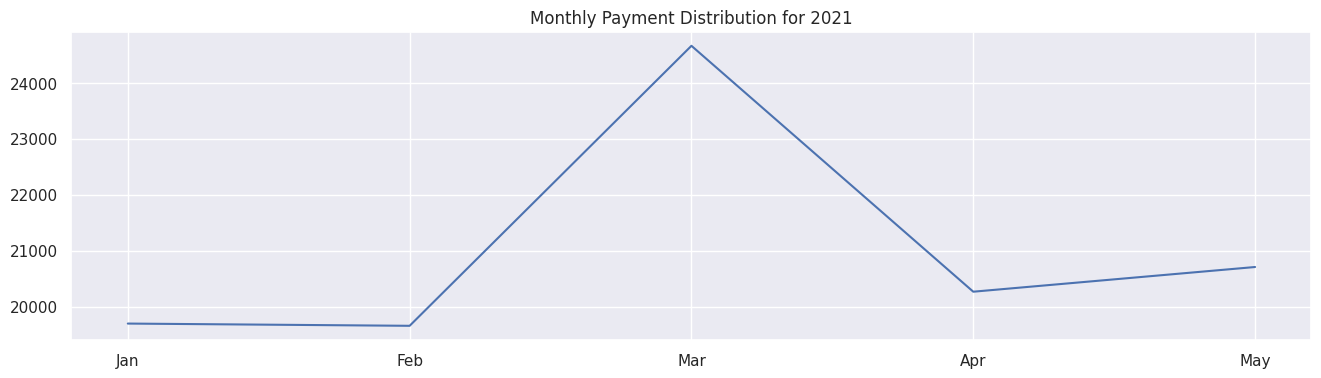

In [6]:
monthly_payment = date_df.loc[(date_df['year']!=2017) & (date_df['year']!=2021)].groupby('month')['payment_cost'].sum()
yearly_monthly_payment = date_df.groupby(['year', 'month'])['payment_cost'].sum()

# Plotting pie chart
plt.figure(figsize=(16, 4))
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],monthly_payment)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Monthly Payment Distribution 2018-2021')
plt.show()

# Plotting pie charts for each year
years = yearly_monthly_payment.index.levels[0]
for year in years:
    monthly_payment_year = yearly_monthly_payment.loc[year]
    plt.figure(figsize=(16, 4))
    plt.plot(monthly_payment_year.index.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}),monthly_payment_year)
    plt.title(f'Monthly Payment Distribution for {year}')
    plt.show()

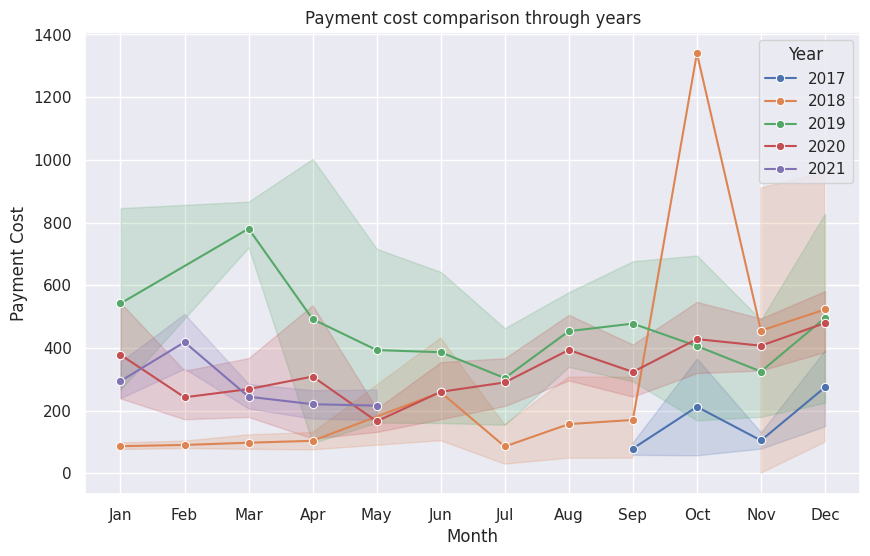

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=date_df[['payment_cost','month','year']], x='month', y='payment_cost', hue='year', marker = 'o', palette="deep")
plt.title('Payment cost comparison through years')
plt.xlabel('Month')
plt.ylabel('Payment Cost')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()

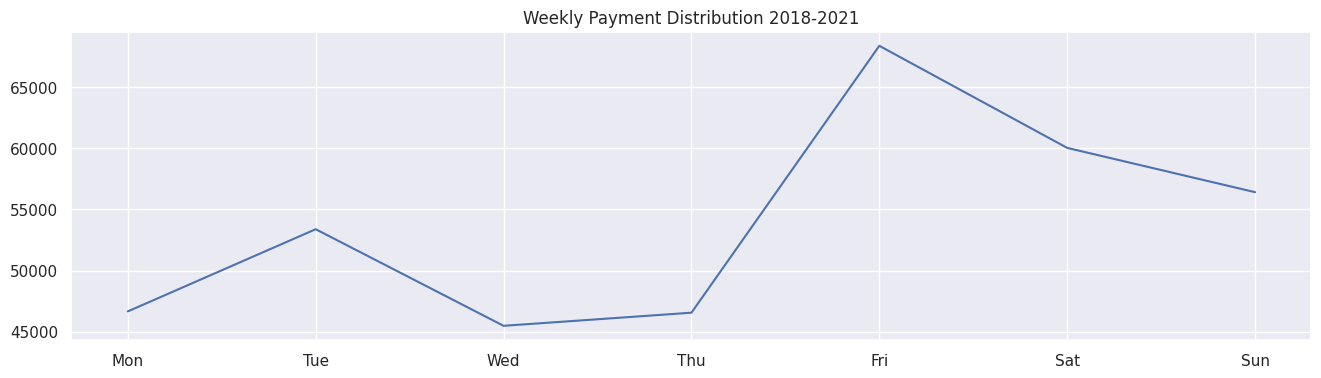

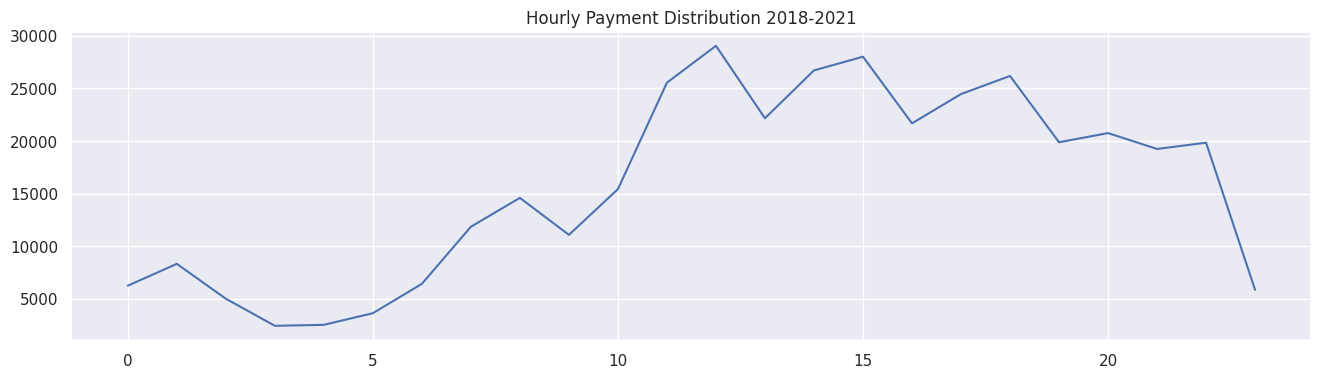

In [9]:
# Plotting pie chart
weekly_payment = date_df.groupby(date_df.weekday)['payment_cost'].sum()

plt.figure(figsize=(16, 4))
plt.plot(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], weekly_payment)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Weekly Payment Distribution 2018-2021')
plt.show()

# Plotting pie chart
hourly_payment = date_df.groupby(date_df.hour)['payment_cost'].sum()

plt.figure(figsize=(16, 4))
plt.plot(np.arange(0,24), hourly_payment)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Hourly Payment Distribution 2018-2021')
plt.show()

In [10]:
print(df.groupby('tariff_class').payment_cost.count(),'------')
print(df.groupby('status').payment_cost.count(),'------')
print(df.groupby('taxi_status').payment_cost.count(),'------')
print(df.groupby('vehicle_color').payment_cost.count(),'------')
print(df.groupby('driver_call_model').payment_cost.count(),'------')

tariff_class
Доставка      2
Комфорт     450
Комфорт+     45
Эконом      708
Name: payment_cost, dtype: int64 ------
status
cancelled    245
finished     960
Name: payment_cost, dtype: int64 ------
taxi_status
cancelled         7
complete        945
driving         217
failed            8
transporting      5
waiting          23
Name: payment_cost, dtype: int64 ------
vehicle_color
бежевый             24
белый              644
голубой              9
жёлтый             225
зелёный              8
зелёный миндаль      1
коричневый          24
красный             16
оранжевый            1
песочный             1
серебристый          6
серый              134
синий               33
тёмно-зелёный        2
фиолетовый           3
чёрный              74
Name: payment_cost, dtype: int64 ------
driver_call_model
no_call      1199
on_demand       6
Name: payment_cost, dtype: int64 ------


In [11]:
#Easy to conclude which columns are irrelevent for analysis
df.drop(columns = ['taxi_status','driver_call_model'], inplace=True)

In [35]:
def barplots(dataframe = time_ind_df):
    for col_name in dataframe:
        if col_name == 'payment_cost':
            continue
        else:
            plt.figure(figsize=(20, 7))
            plt.bar(dataframe.groupby(col_name).payment_cost.count().sort_values(ascending=False).head(10).index,dataframe.groupby(col_name).payment_cost.count().sort_values(ascending=False).head(10))
            plt.title(col_name)
            plt.show()

In [33]:
time_ind_df = df.copy()
time_ind_df = time_ind_df.drop(columns=['created_at_utc','tariff_internal_name'])

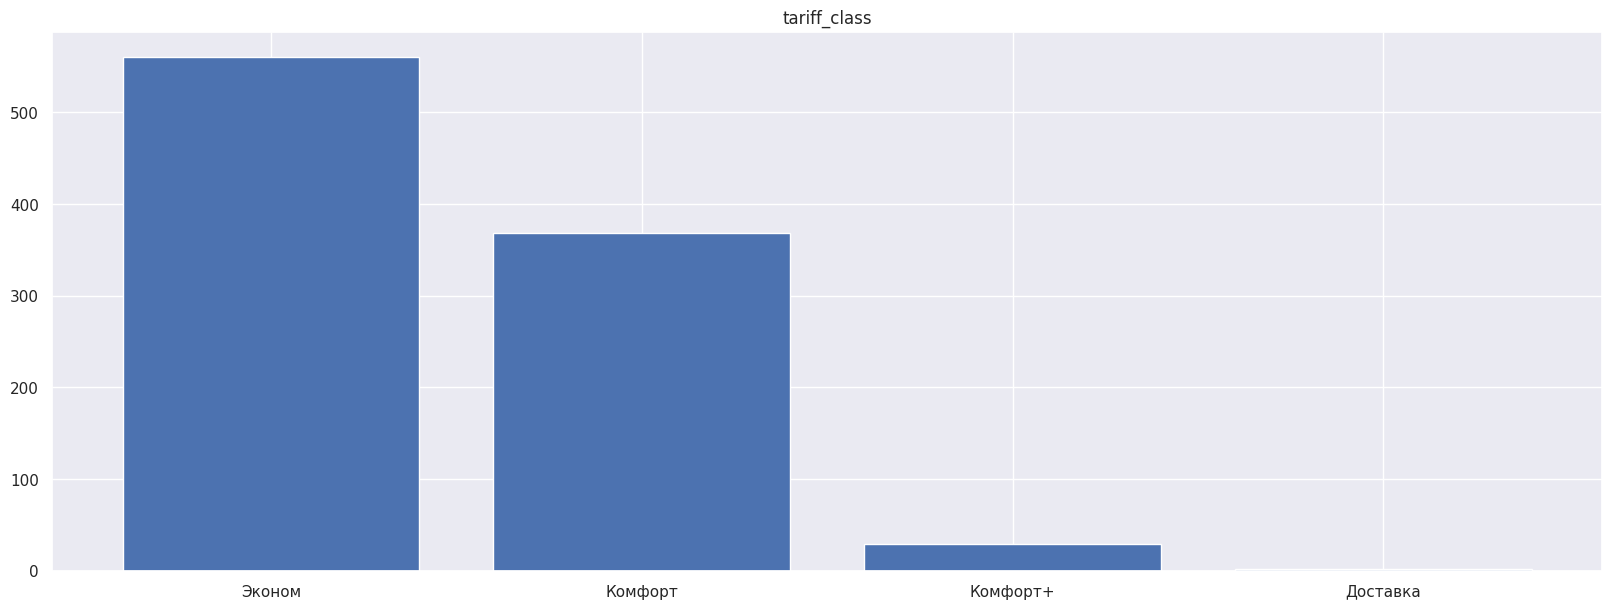

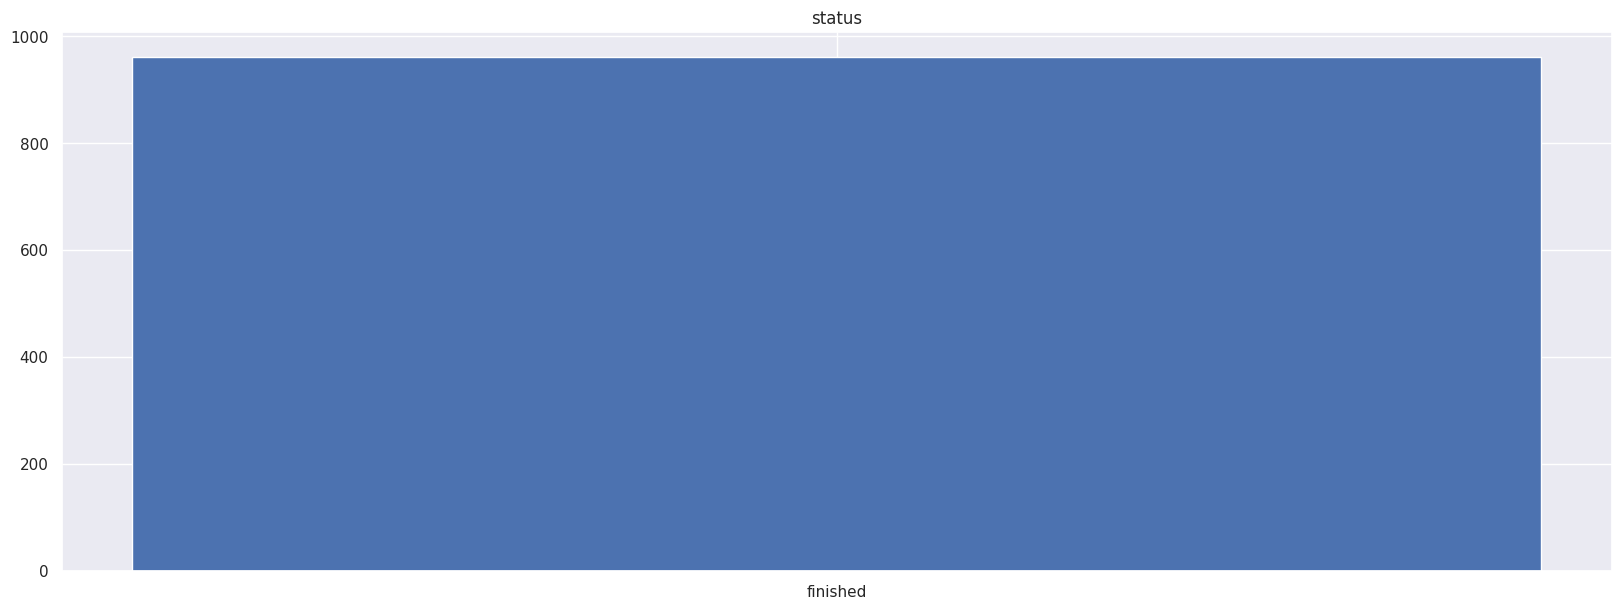

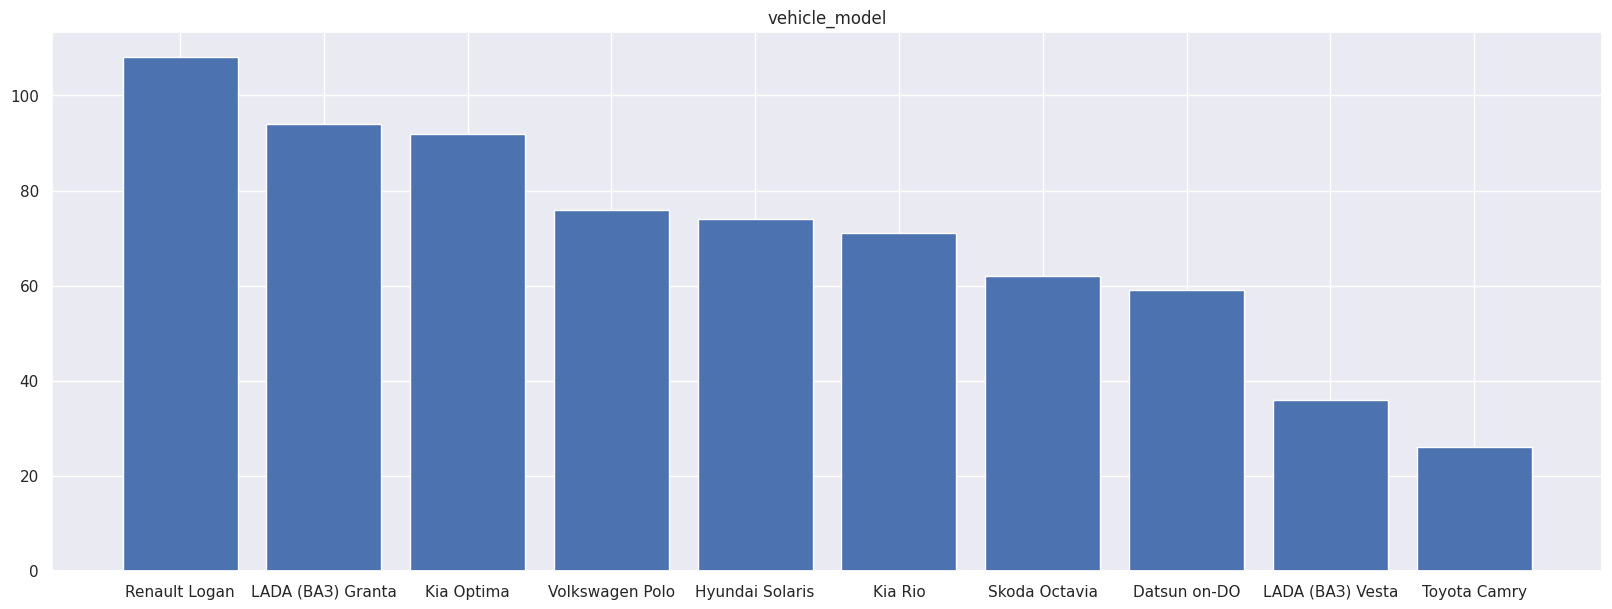

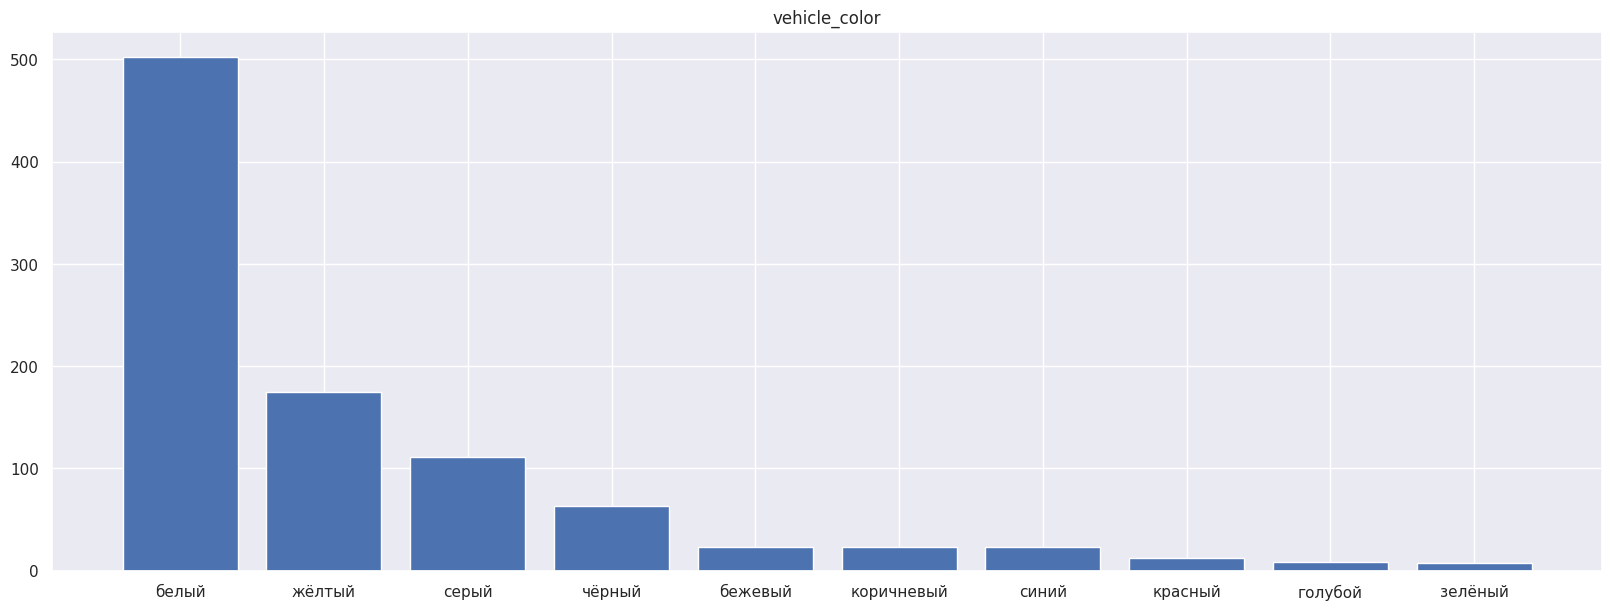

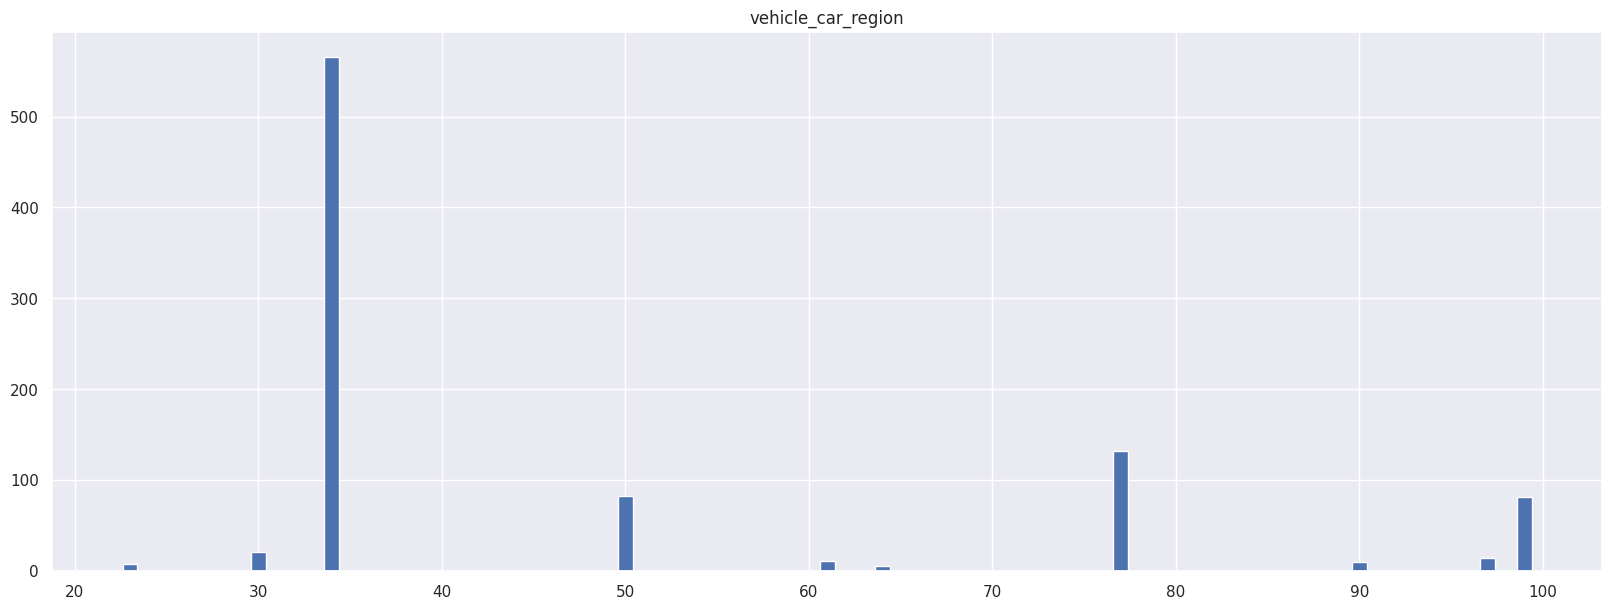

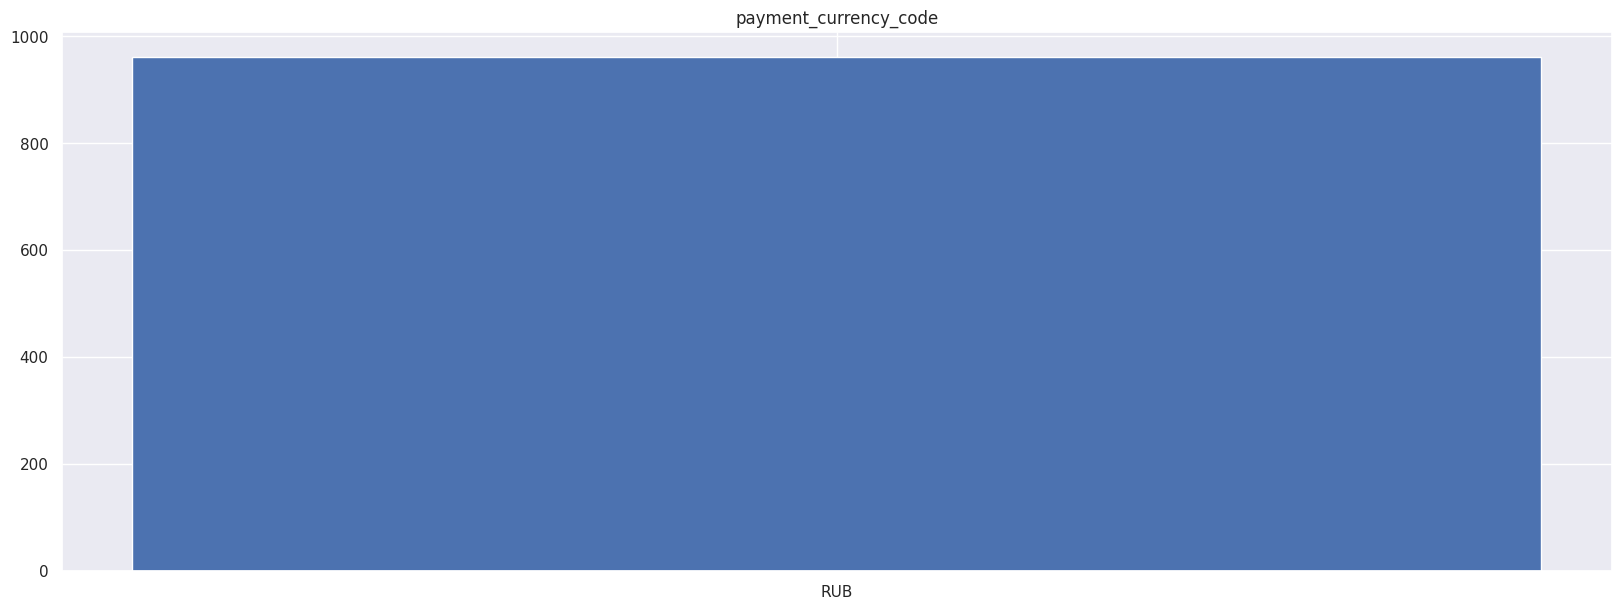

In [36]:
barplots()

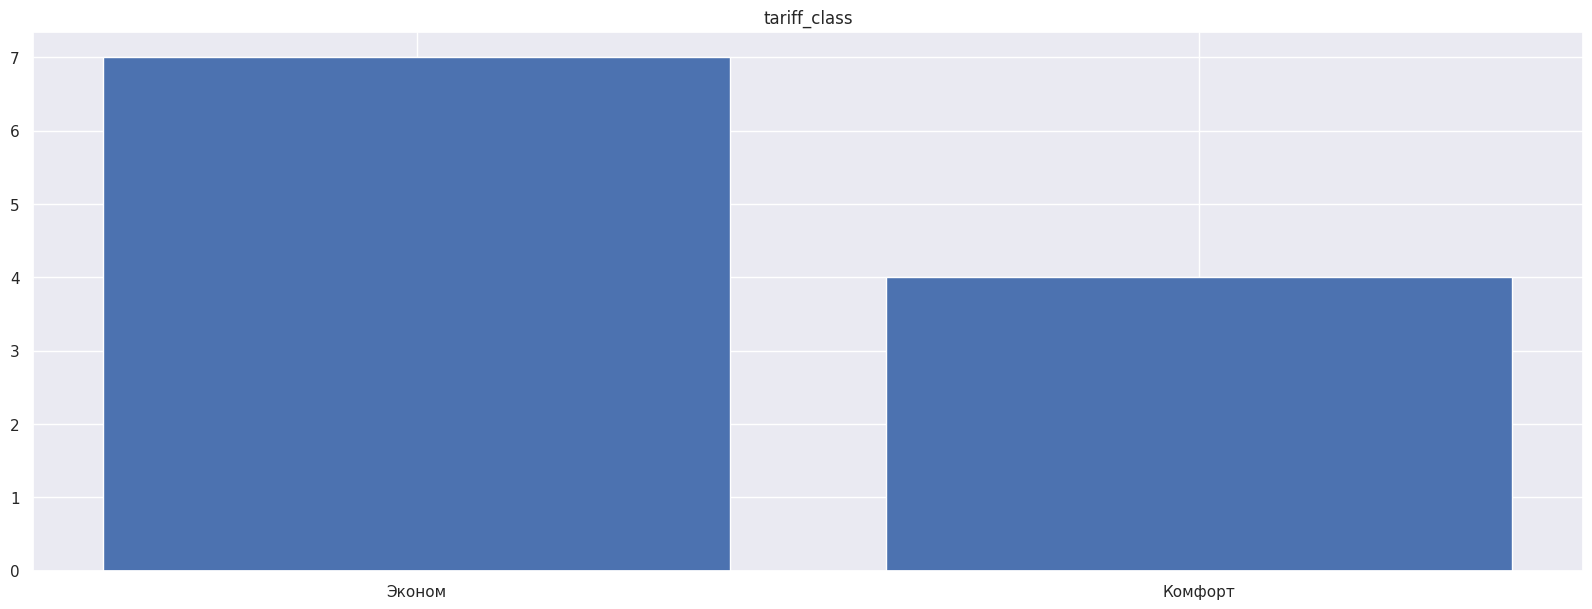

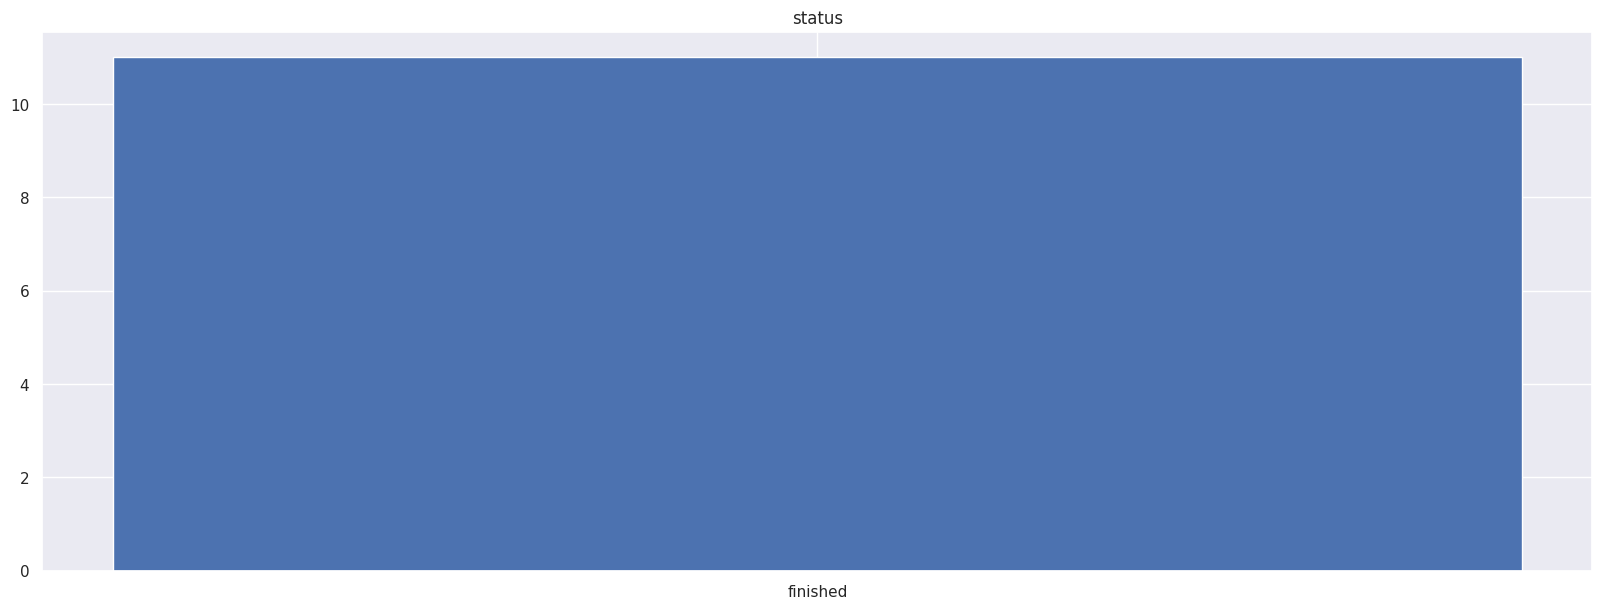

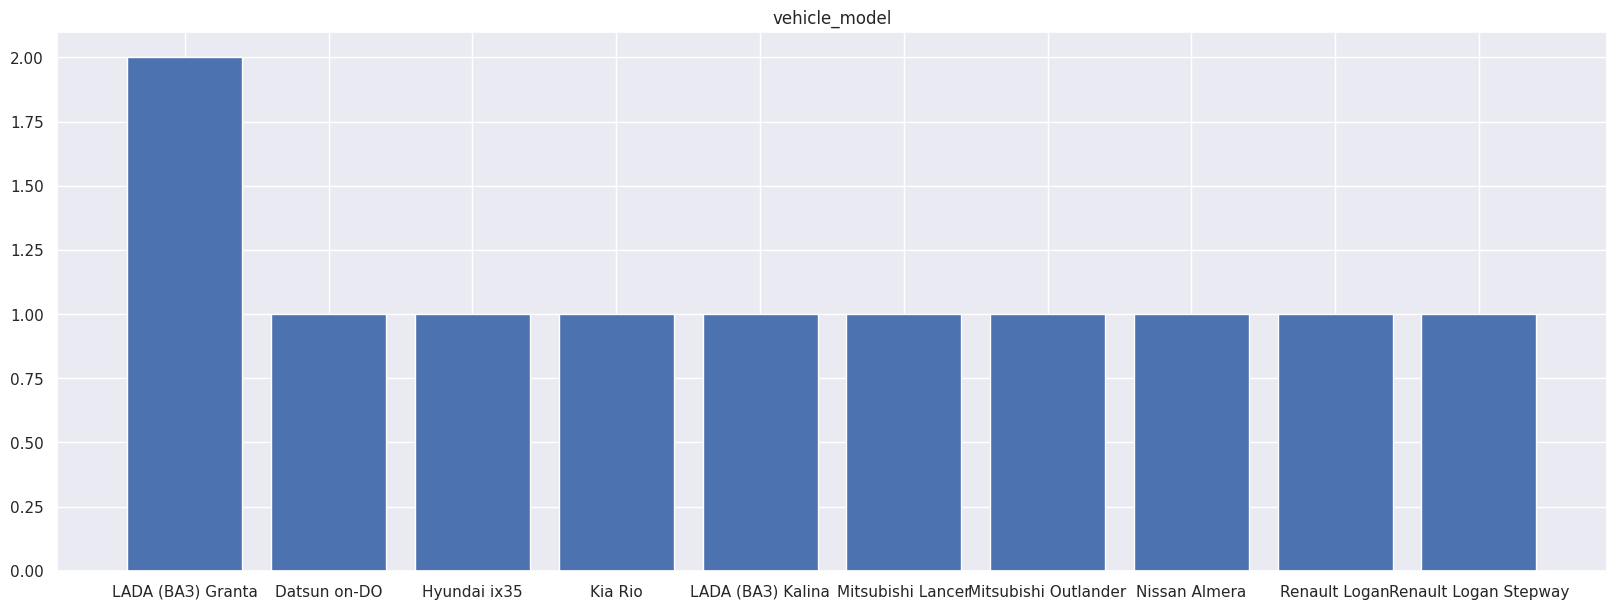

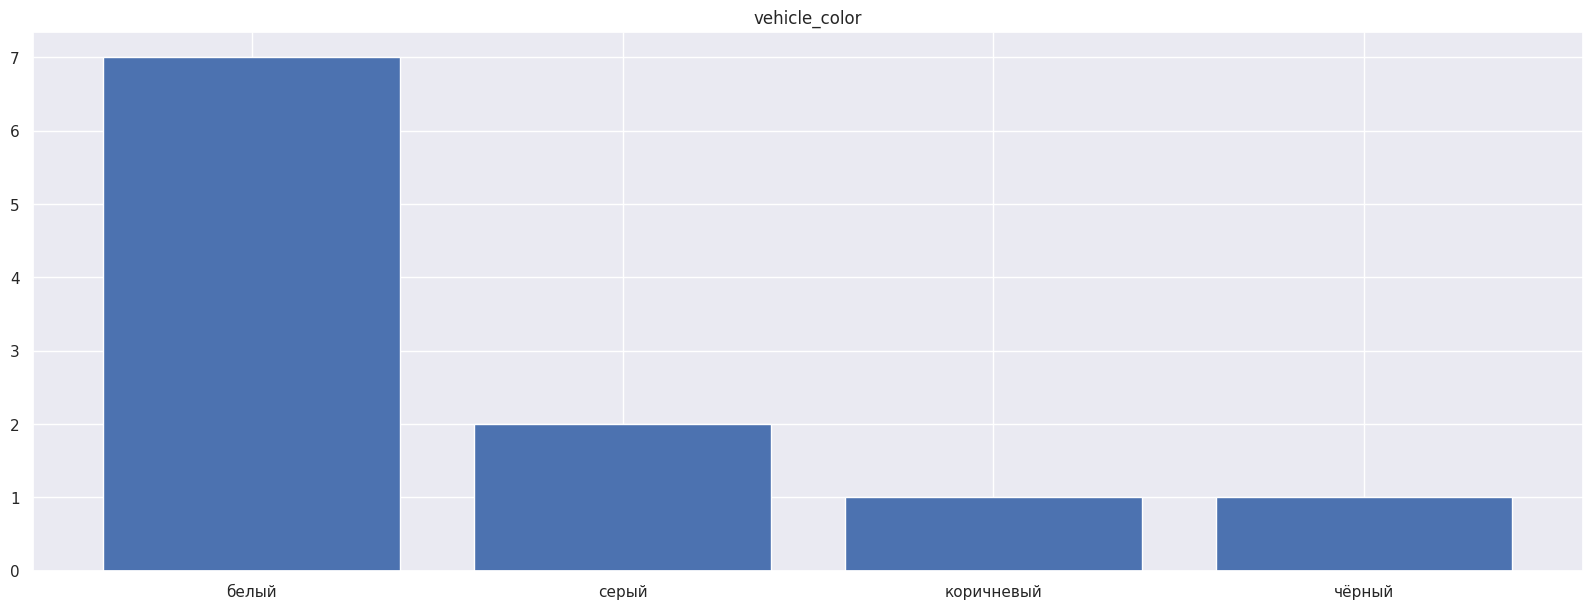

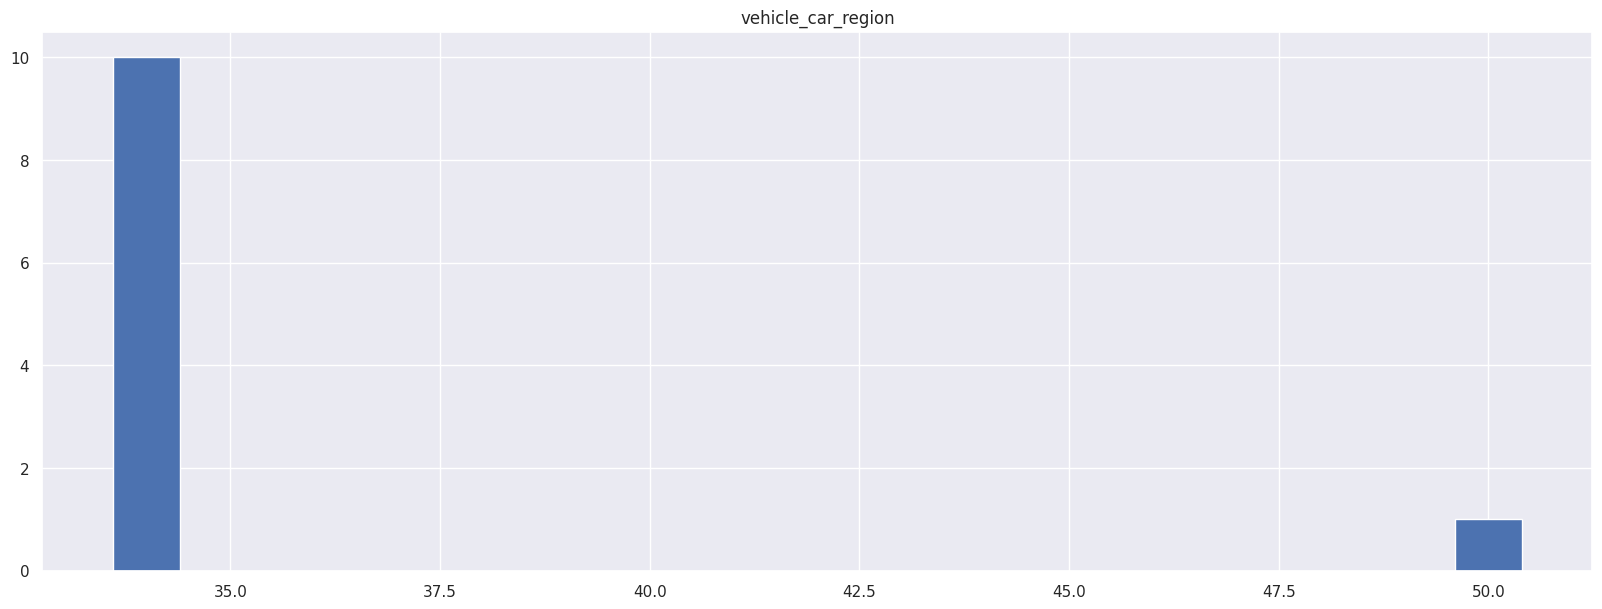

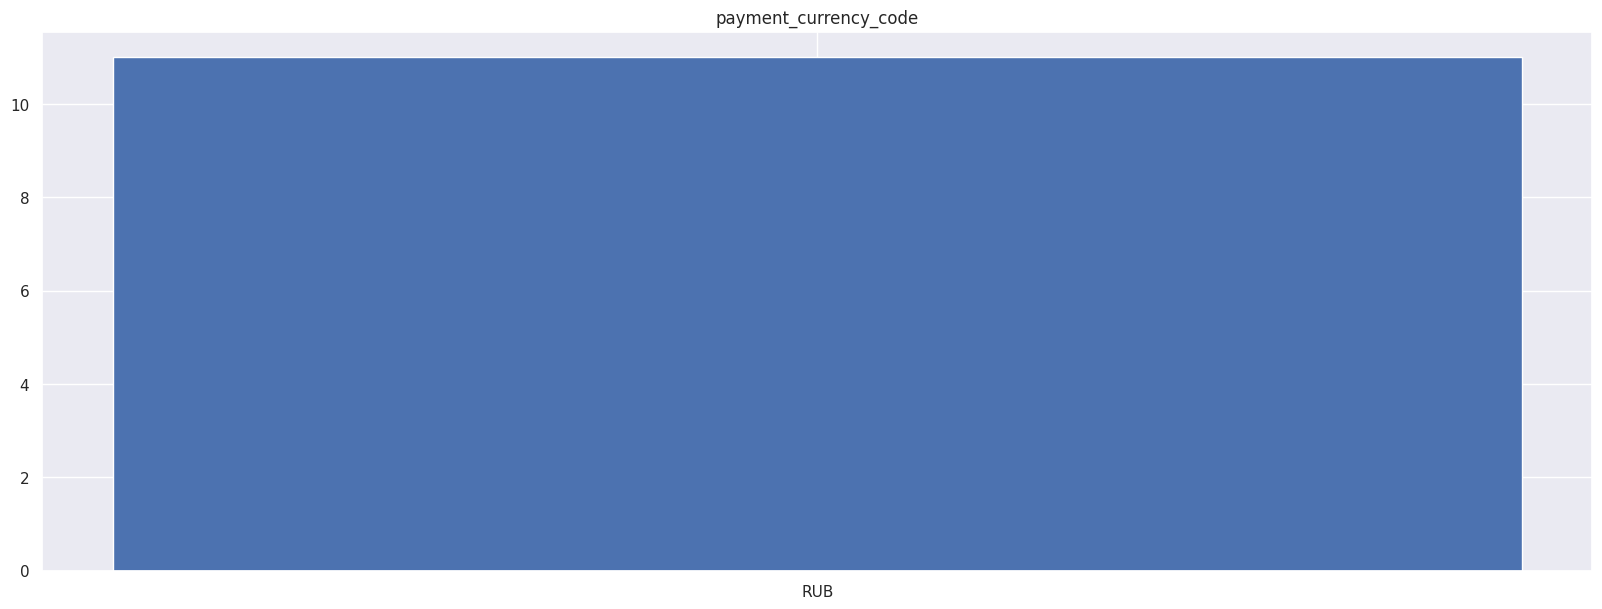

In [38]:
barplots(time_ind_df.loc[df['payment_cost']==0])

In [40]:
time_ind_df = time_ind_df.drop(columns=['status','payment_currency_code'])
time_ind_df

,tariff_class,vehicle_model,vehicle_color,vehicle_car_region,payment_cost
2,Эконом,Renault Logan,белый,34,104.70
3,Эконом,LADA (ВАЗ) Granta,белый,34,120.00
4,Эконом,LADA (ВАЗ) Granta,белый,34,115.50
5,Эконом,LADA (ВАЗ) Granta,белый,34,83.70
6,Эконом,Renault Logan,белый,34,461.90
...,...,...,...,...,...
1140,Эконом,Mitsubishi Lancer,чёрный,34,0.00
1141,Эконом,Renault Duster,чёрный,34,425.50
1142,Эконом,Geely MK,красный,34,438.15
1143,Эконом,Hyundai Sonata,серый,30,98.90
